In [16]:
import pandas as pd
import math

import censusdis.data as ced
import censusdis.maps as cem

from censusdis.states import NJ, KS, MO, IL
from censusdis.places.new_jersey import NEWARK_CITY
from censusdis.msa_msa import KANSAS_CITY_MO_KS_METRO_AREA
from censusdis.datasets import ACS5

from matplotlib.ticker import StrMethodFormatter

In [2]:
# This is a census variable for median household income.
# See https://api.census.gov/data/2020/acs/acs5/variables/B19013_001E.html
MEDIAN_HOUSEHOLD_INCOME_VARIABLE = "B19013_001E"

In [3]:
with ced.contained_within(
    metropolitan_statistical_area_micropolitan_statistical_area=KANSAS_CITY_MO_KS_METRO_AREA
) as cm:
    gdf_kc_tracts = cm.download(
        dataset=ACS5,
        vintage=2020,
        download_variables=["NAME", MEDIAN_HOUSEHOLD_INCOME_VARIABLE],
        state="*",
        tract="*",
        with_geometry=True,
    )

In [9]:
gdf_kc_tracts

,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,STATE,COUNTY,TRACT,NAME,B19013_001E,geometry
0,28140,29,037,060306,"Census Tract 603.06, Cass County, Missouri",90801.0,"POLYGON ((-94.50286 38.81326, -94.50179 38.813..."
1,28140,29,037,060307,"Census Tract 603.07, Cass County, Missouri",98446.0,"POLYGON ((-94.49237 38.81298, -94.49230 38.814..."
2,28140,29,037,060308,"Census Tract 603.08, Cass County, Missouri",75799.0,"POLYGON ((-94.45821 38.78231, -94.45810 38.784..."
3,28140,29,037,060309,"Census Tract 603.09, Cass County, Missouri",79205.0,"POLYGON ((-94.45657 38.81145, -94.45580 38.826..."
4,28140,29,037,060401,"Census Tract 604.01, Cass County, Missouri",120261.0,"POLYGON ((-94.40005 38.82792, -94.39982 38.831..."
...,...,...,...,...,...,...,...
602,28140,29,095,013801,"Census Tract 138.01, Jackson County, Missouri",81406.0,"POLYGON ((-94.36085 38.92164, -94.36028 38.924..."
603,28140,29,095,013803,"Census Tract 138.03, Jackson County, Missouri",78907.0,"POLYGON ((-94.36257 38.91026, -94.36245 38.912..."
604,28140,29,095,013804,"Census Tract 138.04, Jackson County, Missouri",107456.0,"POLYGON ((-94.37712 38.90312, -94.37302 38.902..."
605,28140,29,095,013902,"Census Tract 139.02, Jackson County, Missouri",99219.0,"POLYGON ((-94.21906 38.88236, -94.21896 38.883..."


NameError: name 'gdf_kc' is not defined

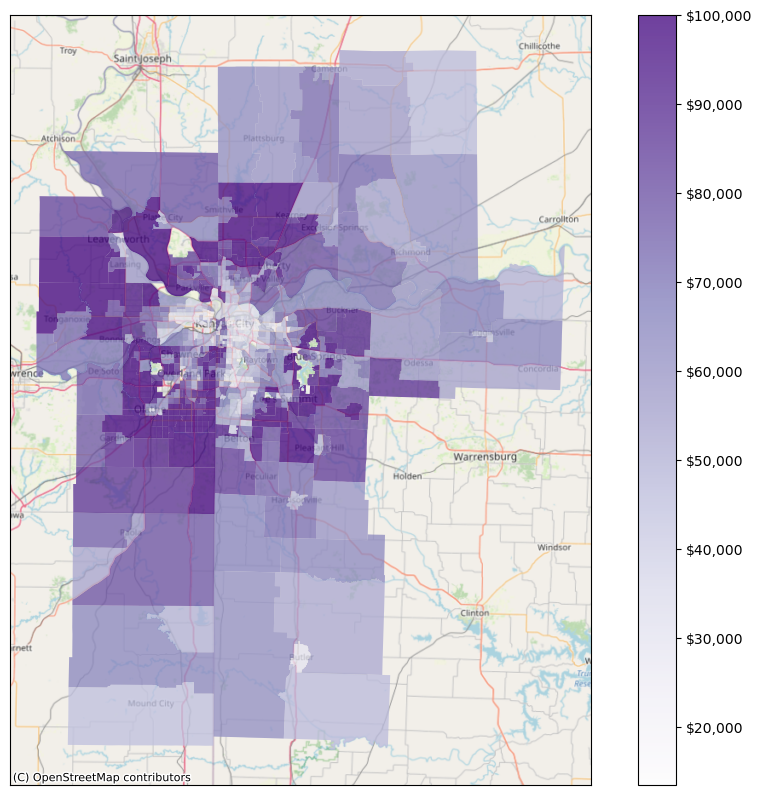

In [5]:
# Plot median income of every tract in the CBSA.
ax = cem.plot_map(
    gdf_kc_tracts,
    MEDIAN_HOUSEHOLD_INCOME_VARIABLE,
    cmap="Purples",
    vmax=100_000,
    alpha=0.75,
    with_background=True,
    figsize=(12, 10),
    legend=True,
    legend_kwds={"format": StrMethodFormatter("${x:,.0f}"), "alpha": 0.75},
)

# # Format the county names for labels.
# geo_label = gdf_kc_counties["NAME"].apply(lambda c: c.replace(", ", ",\n"))

# # Outline MO counties in blue and name them.
# ax = cem.plot_map(
#     gdf_kc_counties[gdf_kc_counties["STATE"] == MO],
#     edgecolor="blue",
#     color="#00000000",
#     linewidth=1,
#     geo_label=geo_label,
#     geo_label_text_kwargs={"color": "blue"},
#     ax=ax,
# )

# # Outline KS counties in red and name them.
# ax = cem.plot_map(
#     gdf_kc_counties[gdf_kc_counties["STATE"] == KS],
#     edgecolor="red",
#     color="#00000000",
#     linewidth=1,
#     geo_label=geo_label,
#     geo_label_text_kwargs={"color": "red"},
#     ax=ax,
# )

# Outline the whole CBSA in black.
ax = cem.plot_map(gdf_kc.boundary, color="black", linewidth=2, ax=ax)

_ = ax.set_title(
    "Median Household Income by Census Tract in the Kansas City CBSA - 2020"
)

# Pydeck Visualization

In [18]:
DATA_URL = "https://raw.githubusercontent.com/visgl/deck.gl-data/master/examples/geojson/vancouver-blocks.json"
json = pd.read_json(DATA_URL)
df = pd.DataFrame()

# Parse the geometry out in Pandas
df["coordinates"] = json["features"].apply(lambda row: row["geometry"]["coordinates"])


df.head()

,coordinates
0,"[[[-123.0249569, 49.240719], [-123.0241582, 49..."
1,"[[[-123.0713722, 49.2720583], [-123.069715, 49..."
2,"[[[-123.0716588, 49.2715175], [-123.0733174, 4..."
3,"[[[-123.0746276, 49.2715849], [-123.0758105, 4..."
4,"[[[-123.0753056, 49.2686511], [-123.0736492, 4..."


In [6]:
gdf_kc_tracts.head(2)

,METROPOLITAN_STATISTICAL_AREA_MICROPOLITAN_STATISTICAL_AREA,STATE,COUNTY,TRACT,NAME,B19013_001E,geometry
0,28140,29,037,060306,"Census Tract 603.06, Cass County, Missouri",90801.0,"POLYGON ((-94.50286 38.81326, -94.50179 38.813..."
1,28140,29,037,060307,"Census Tract 603.07, Cass County, Missouri",98446.0,"POLYGON ((-94.49237 38.81298, -94.49230 38.814..."


In [ ]:
import math
import pydeck as pdk

# Parse the geometry out in Pandas
df["coordinates"] = json["features"].apply(lambda row: row["geometry"]["coordinates"])
df["valuePerSqm"] = json["features"].apply(lambda row: row["properties"]["valuePerSqm"])
df["growth"] = json["features"].apply(lambda row: row["properties"]["growth"])
df["elevation"] = json["features"].apply(lambda row: calculate_elevation(row["properties"]["valuePerSqm"]))
df["fill_color"] = json["features"].apply(lambda row: color_scale(row["properties"]["growth"]))

# # Add sunlight shadow to the polygons
# sunlight = {
#     "@@type": "_SunLight",
#     "timestamp": 1564696800000,  # Date.UTC(2019, 7, 1, 22),
#     "color": [255, 255, 255],
#     "intensity": 1.0,
#     "_shadow": True,
# }

# ambient_light = {"@@type": "AmbientLight", "color": [255, 255, 255], "intensity": 1.0}

# lighting_effect = {
#     "@@type": "LightingEffect",
#     "shadowColor": [0, 0, 0, 0.5],
#     "ambientLight": ambient_light,
#     "directionalLights": [sunlight],
# }

view_state = pdk.ViewState(
    **{"latitude": 38.119995,  
       "longitude": -96.235479, 
       "zoom": 3, 
       "maxZoom": 16, 
       "pitch": 0, 
       "bearing": 0}
)

polygon_layer = pdk.Layer(
    "PolygonLayer",
    gdf_kc_tracts,
    id="geojson",
    opacity=0.8,
    stroked=False,
    get_polygon="coordinates",
    filled=True,
    extruded=True,
    wireframe=True,
    get_elevation="elevation",
    get_fill_color="fill_color",
    get_line_color=[255, 255, 255],
    auto_highlight=True,
    pickable=True,
)

tooltip = {"html": "<b>Value per Square Meter:</b> {valuePerSqm} <br /><b>Growth rate:</b> {growth}"}

r = pdk.Deck(
    polygon_layer,
    initial_view_state=view_state,
    effects=[lighting_effect],
    map_style=pdk.map_styles.LIGHT,
    tooltip=tooltip,
)
r.to_html("polygon_layer.html")